# JSON exercise

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import json
from pandas.io.json import json_normalize

# Find the 10 countries with most projects

In [4]:
data=pd.DataFrame(json.load((open('data/world_bank_projects.json')))).countryshortname.value_counts().head(10)
data

Indonesia             19
China                 19
Vietnam               17
India                 16
Yemen, Republic of    13
Bangladesh            12
Nepal                 12
Morocco               12
Mozambique            11
Africa                11
Name: countryshortname, dtype: int64

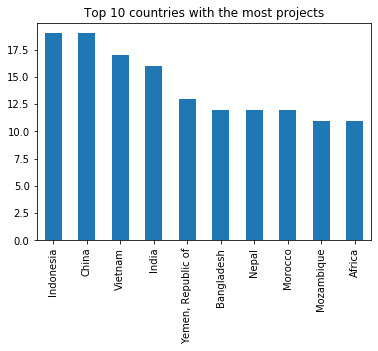

In [5]:
data.plot(kind='bar',title='Top 10 countries with the most projects')
plt.show()

# Find the top 10 major project themes

In [6]:
data=json.load((open('data/world_bank_projects.json')))
data[0]

{'sector': [{'Name': 'Primary education'},
  {'Name': 'Secondary education'},
  {'Name': 'Public administration- Other social services'},
  {'Name': 'Tertiary education'}],
 'supplementprojectflg': 'N',
 'projectfinancialtype': 'IDA',
 'prodline': 'PE',
 'mjtheme': ['Human development'],
 'idacommamt': 130000000,
 'impagency': 'MINISTRY OF EDUCATION',
 'project_name': 'Ethiopia General Education Quality Improvement Project II',
 'mjthemecode': '8,11',
 'closingdate': '2018-07-07T00:00:00Z',
 'totalcommamt': 130000000,
 'id': 'P129828',
 'mjsector_namecode': [{'code': 'EX', 'name': 'Education'},
  {'code': 'EX', 'name': 'Education'},
  {'code': 'BX', 'name': 'Public Administration, Law, and Justice'},
  {'code': 'EX', 'name': 'Education'}],
 'docty': 'Project Information Document,Indigenous Peoples Plan,Project Information Document',
 'sector1': {'Percent': 46, 'Name': 'Primary education'},
 'lendinginstr': 'Investment Project Financing',
 'countrycode': 'ET',
 'sector2': {'Percent': 26

In [8]:
data=json.load((open('data/world_bank_projects.json')))
data=json_normalize(data, 'mjtheme_namecode')#pull out nest in json

In [9]:
comparison=data['name']!='' #try to eliminate missing values in names
comp_data=data[comparison]
codes=comp_data.code.unique()# make sure that there are no blanks 
names=comp_data.name.unique()
print('Lengths of (Codes, Names) :',(len(codes),len(names))) #even list size, this is important for map function

Lengths of (Codes, Names) : (11, 11)


In [10]:
codes_map=dict(zip(codes,names))
codes_map

{'8': 'Human development',
 '1': 'Economic management',
 '6': 'Social protection and risk management',
 '5': 'Trade and integration',
 '2': 'Public sector governance',
 '11': 'Environment and natural resources management',
 '7': 'Social dev/gender/inclusion',
 '4': 'Financial and private sector development',
 '10': 'Rural development',
 '9': 'Urban development',
 '3': 'Rule of law'}

In [11]:
data.code.map(codes_map).value_counts().head(10)

Environment and natural resources management    250
Rural development                               216
Human development                               210
Public sector governance                        199
Social protection and risk management           168
Financial and private sector development        146
Social dev/gender/inclusion                     130
Trade and integration                            77
Urban development                                50
Economic management                              38
Name: code, dtype: int64

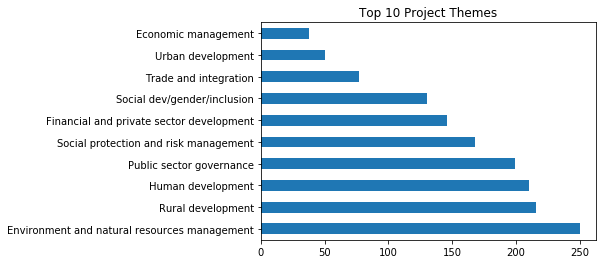

In [12]:
data.code.map(codes_map).value_counts().head(10).plot(kind='barh',title='Top 10 Project Themes')
plt.show()

# Done